# Inspect training data (time series)

## Preliminaries

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import time

import numpy as np
import h5py
import librosa

from matplotlib import mlab
from matplotlib import gridspec
from scipy.interpolate import interp1d

from plottools import force_aspect, plot_spectrogram_label, create_weights

## Read in the training sample

In [5]:
# Path to the directory where all data is stored
data_path = '../data'

# Read in the HDF file
print(os.path.join(data_path, 'training', 'timeseries', 'training_GW170104_0100_1200_16k.h5'))
with h5py.File(os.path.join(data_path, 'training', 'timeseries', 'training_GW170104_0100_1200_16k.h5'), 'r') as file:
    timeseries = np.array(file['timeseries'])
    labels = np.array(file['labels'])
    chirpmasses = np.array(file['chirpmasses'])
    distances = np.array(file['distances'])

../data/training/timeseries/training_GW170104_0100_1200_16k.h5


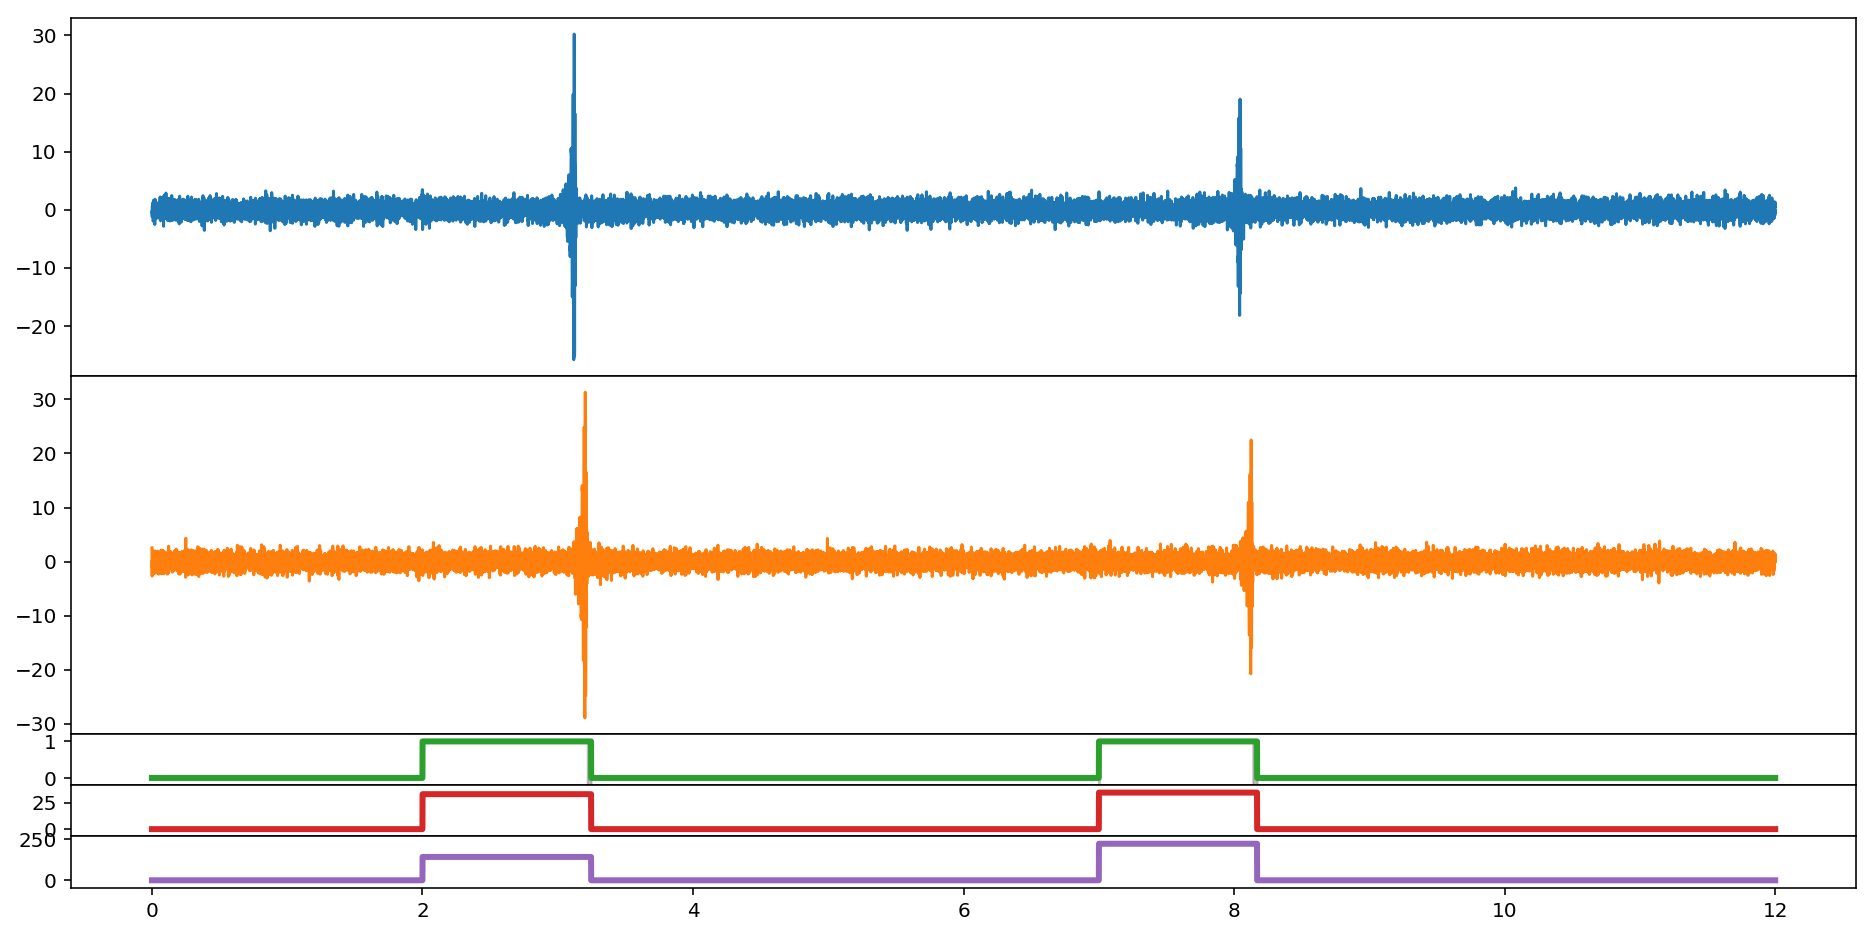

---------------------------------------------------------------------------------------------------------------------


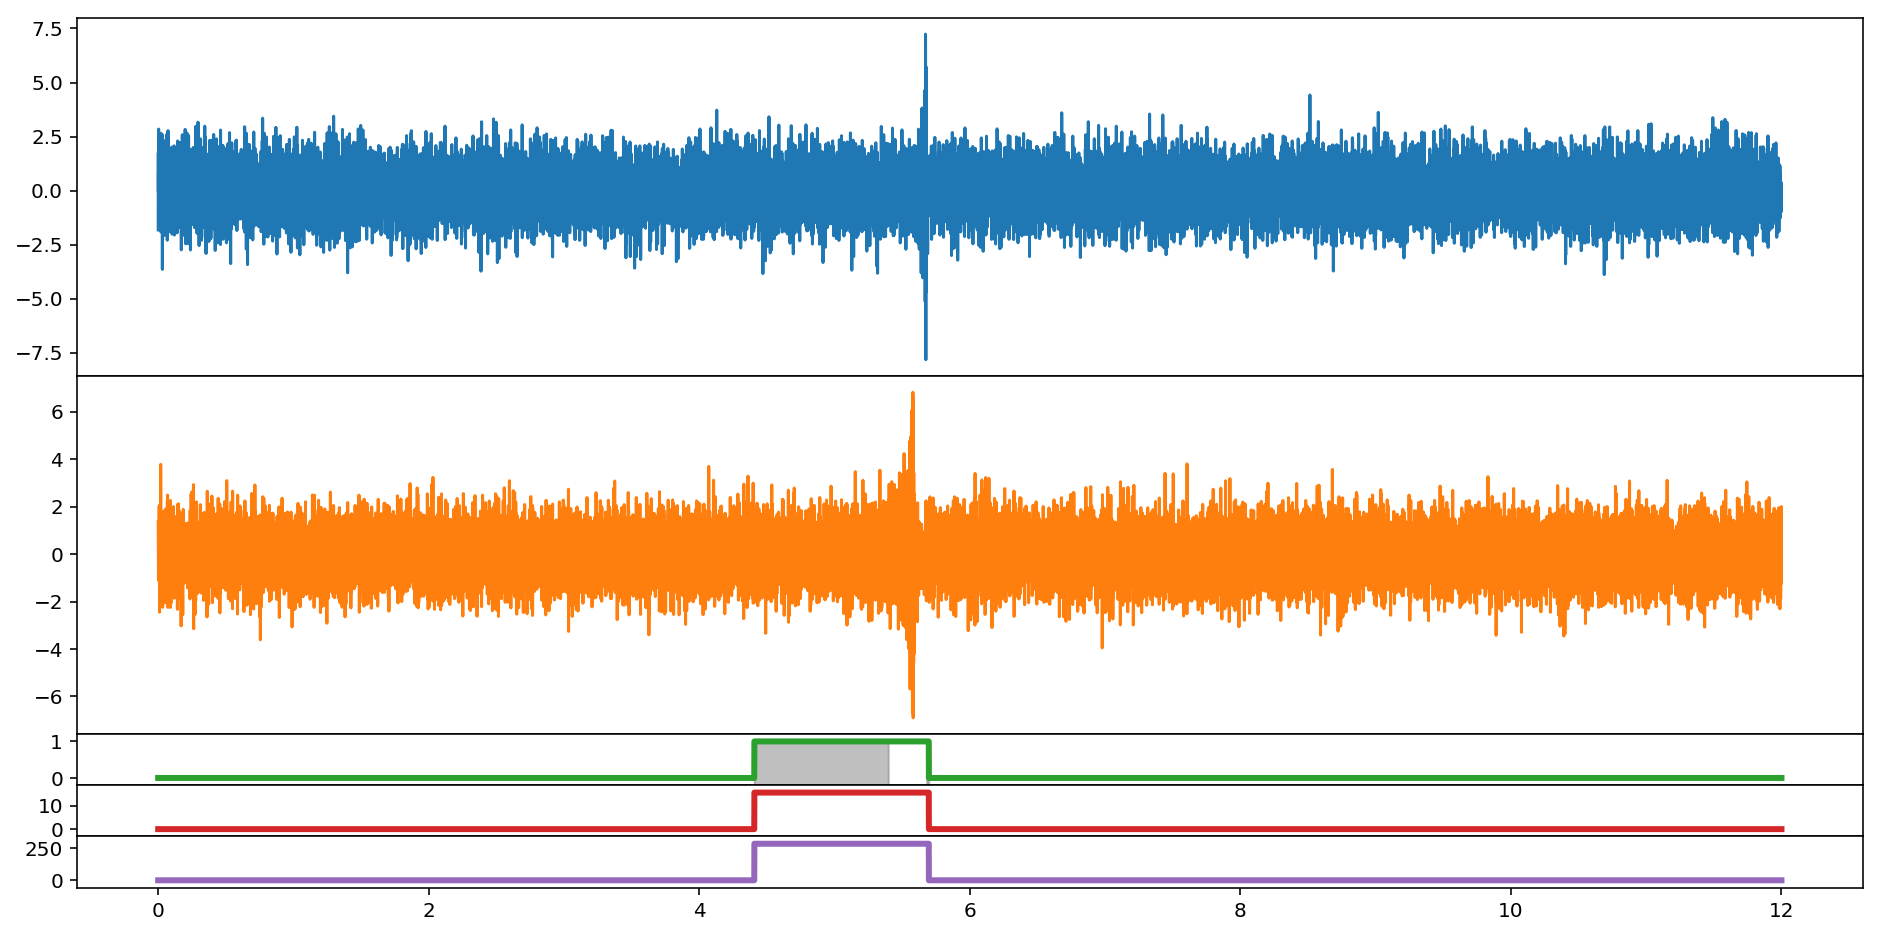

---------------------------------------------------------------------------------------------------------------------


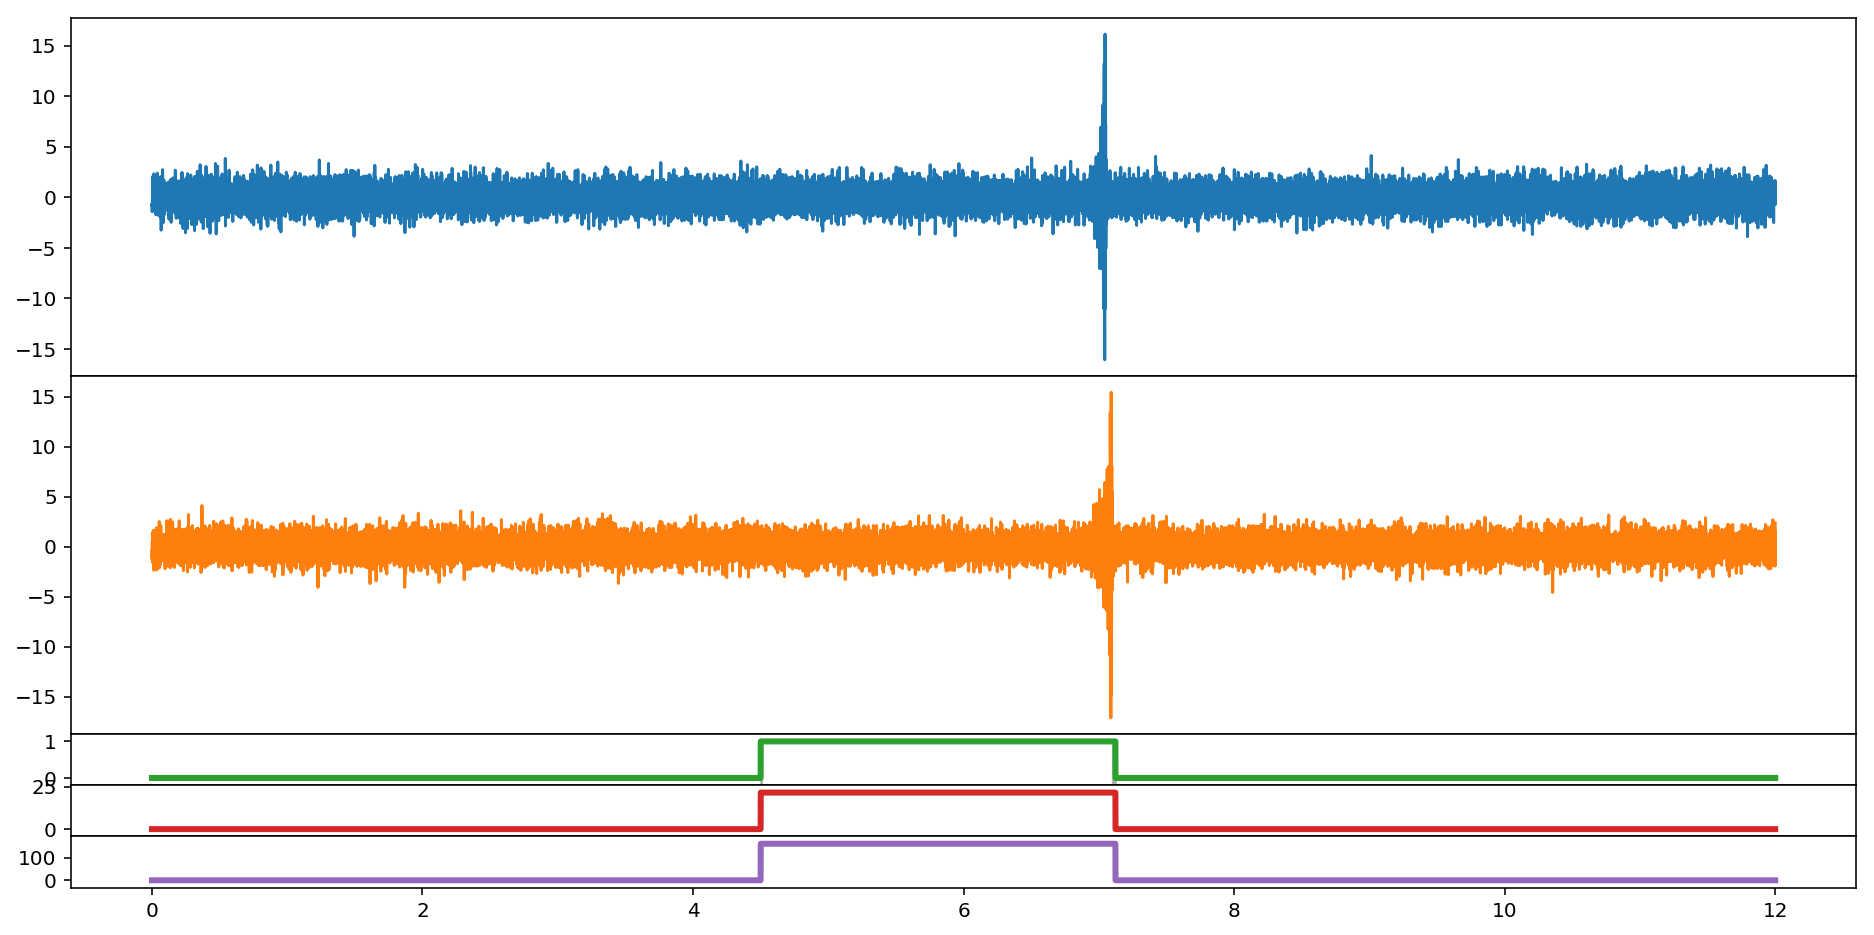

---------------------------------------------------------------------------------------------------------------------


/lustre/home/tgebhard/tf-1.0.0_gpu/lib/python3.5/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


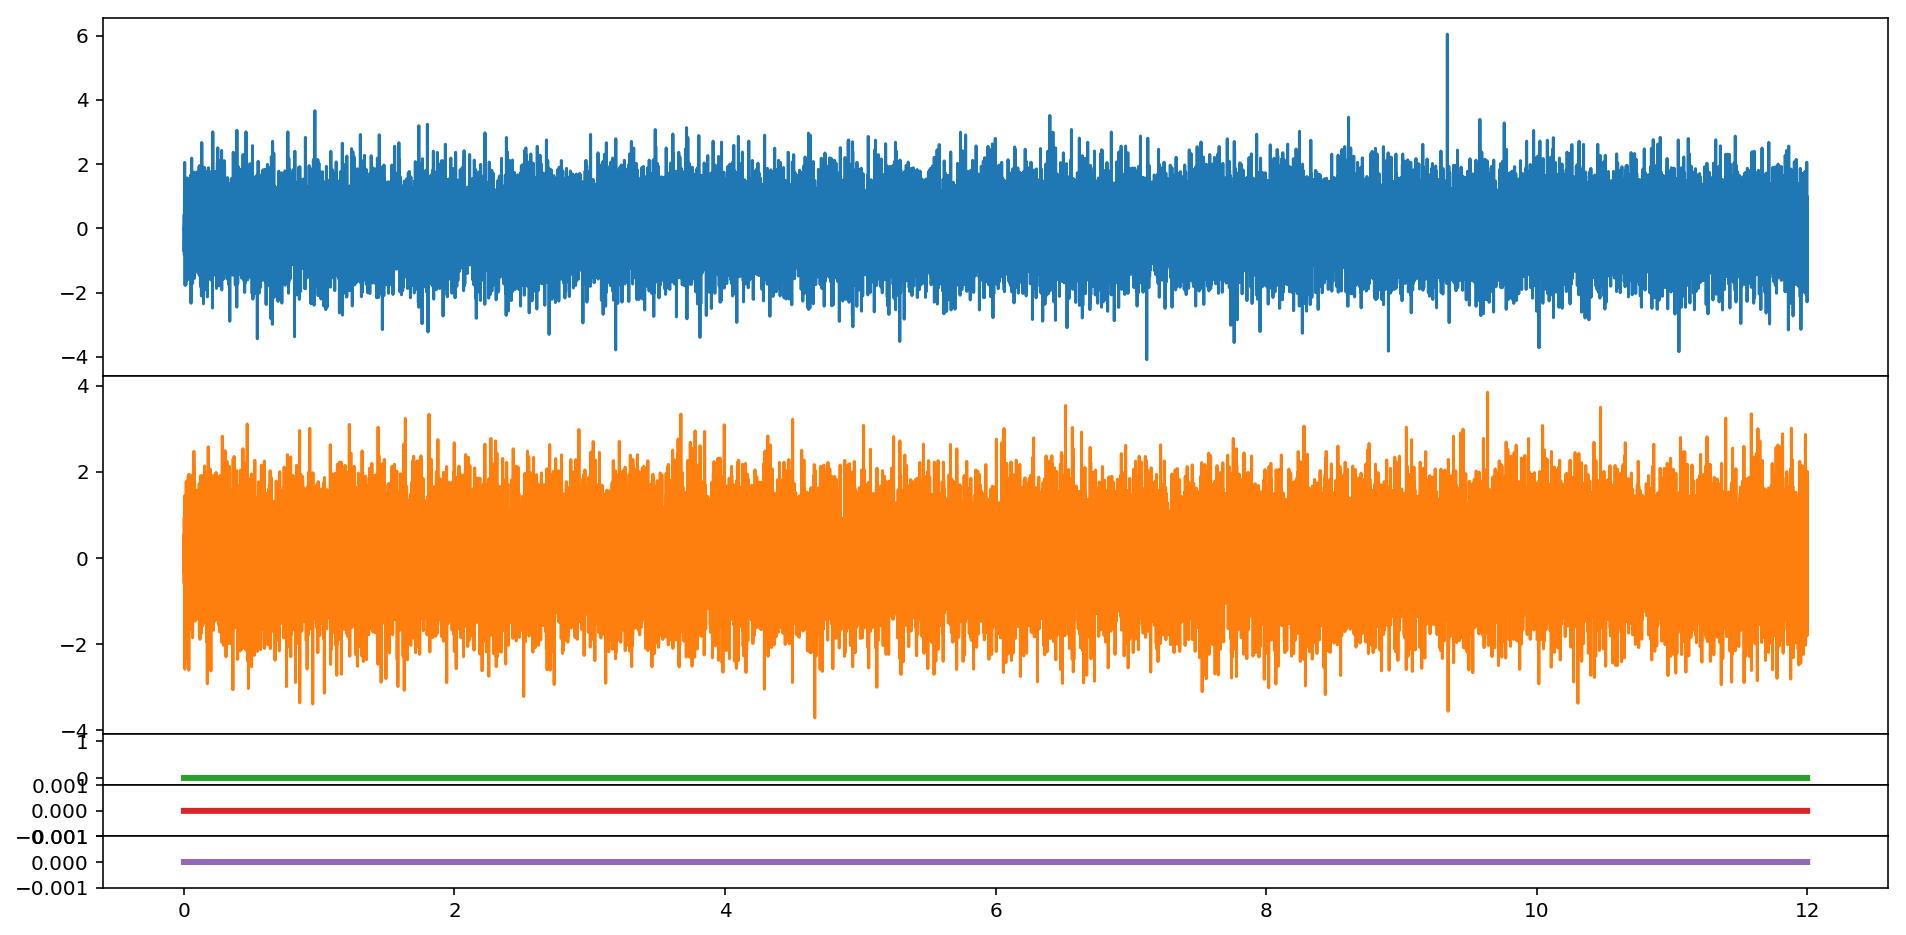

---------------------------------------------------------------------------------------------------------------------


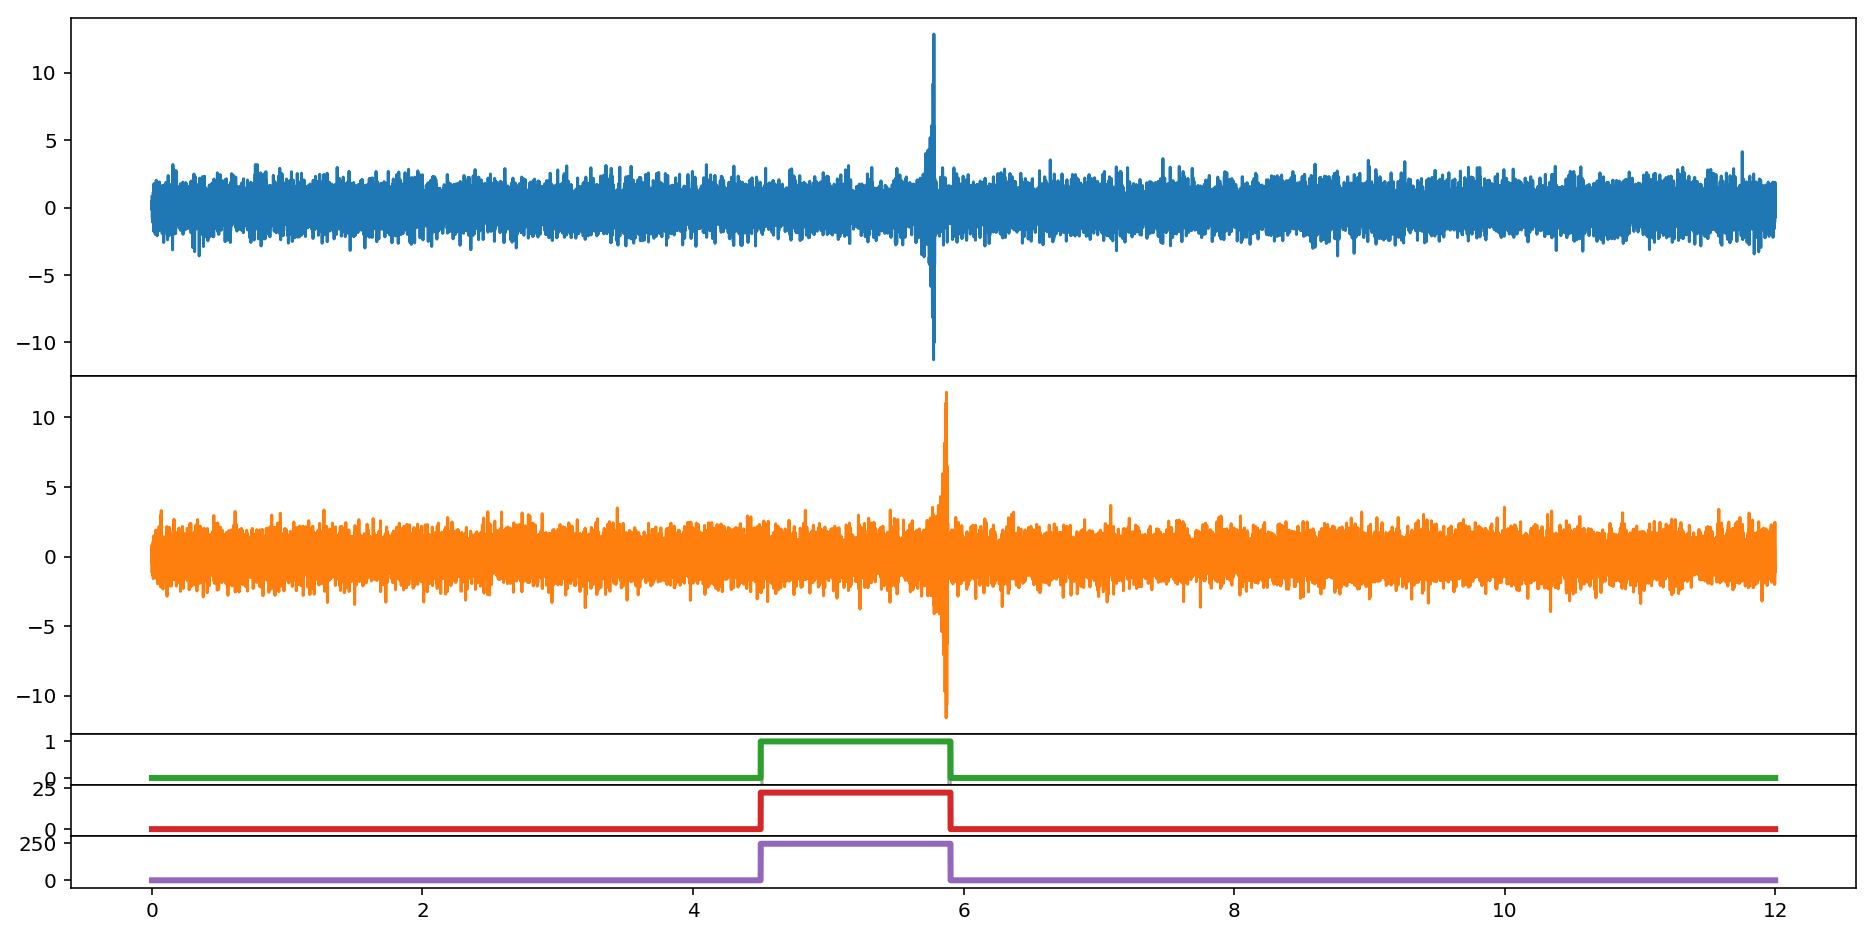

---------------------------------------------------------------------------------------------------------------------


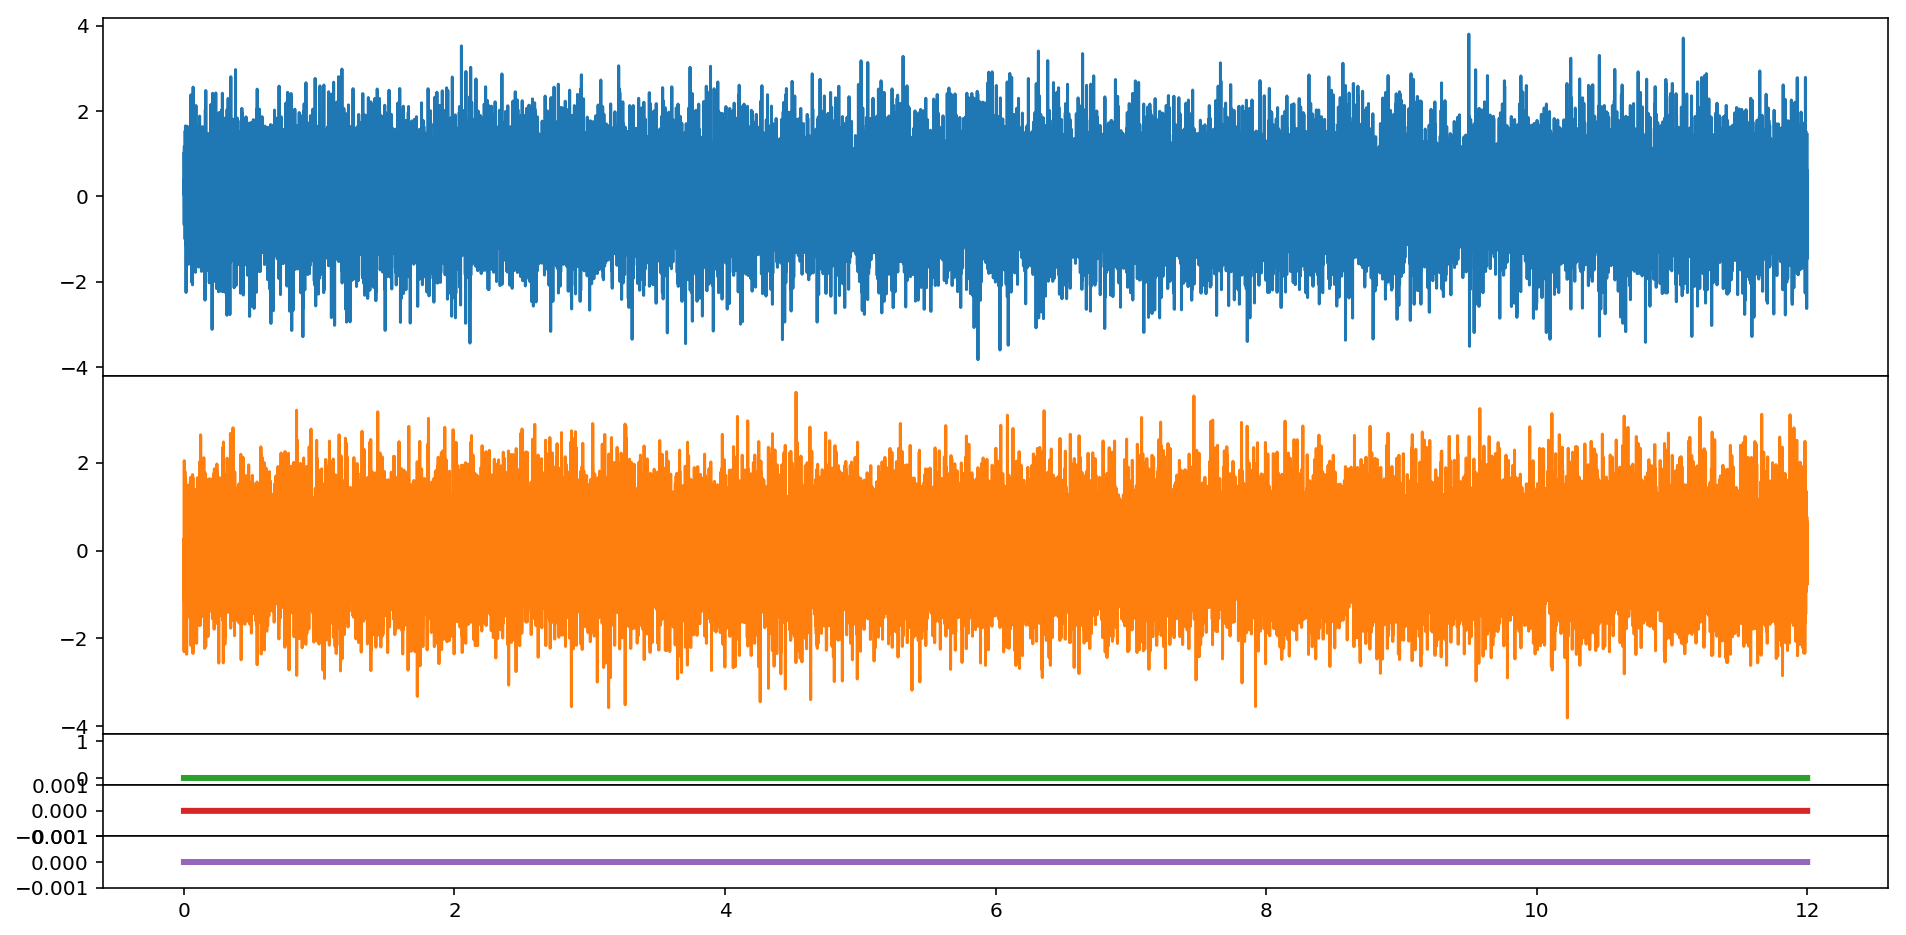

---------------------------------------------------------------------------------------------------------------------


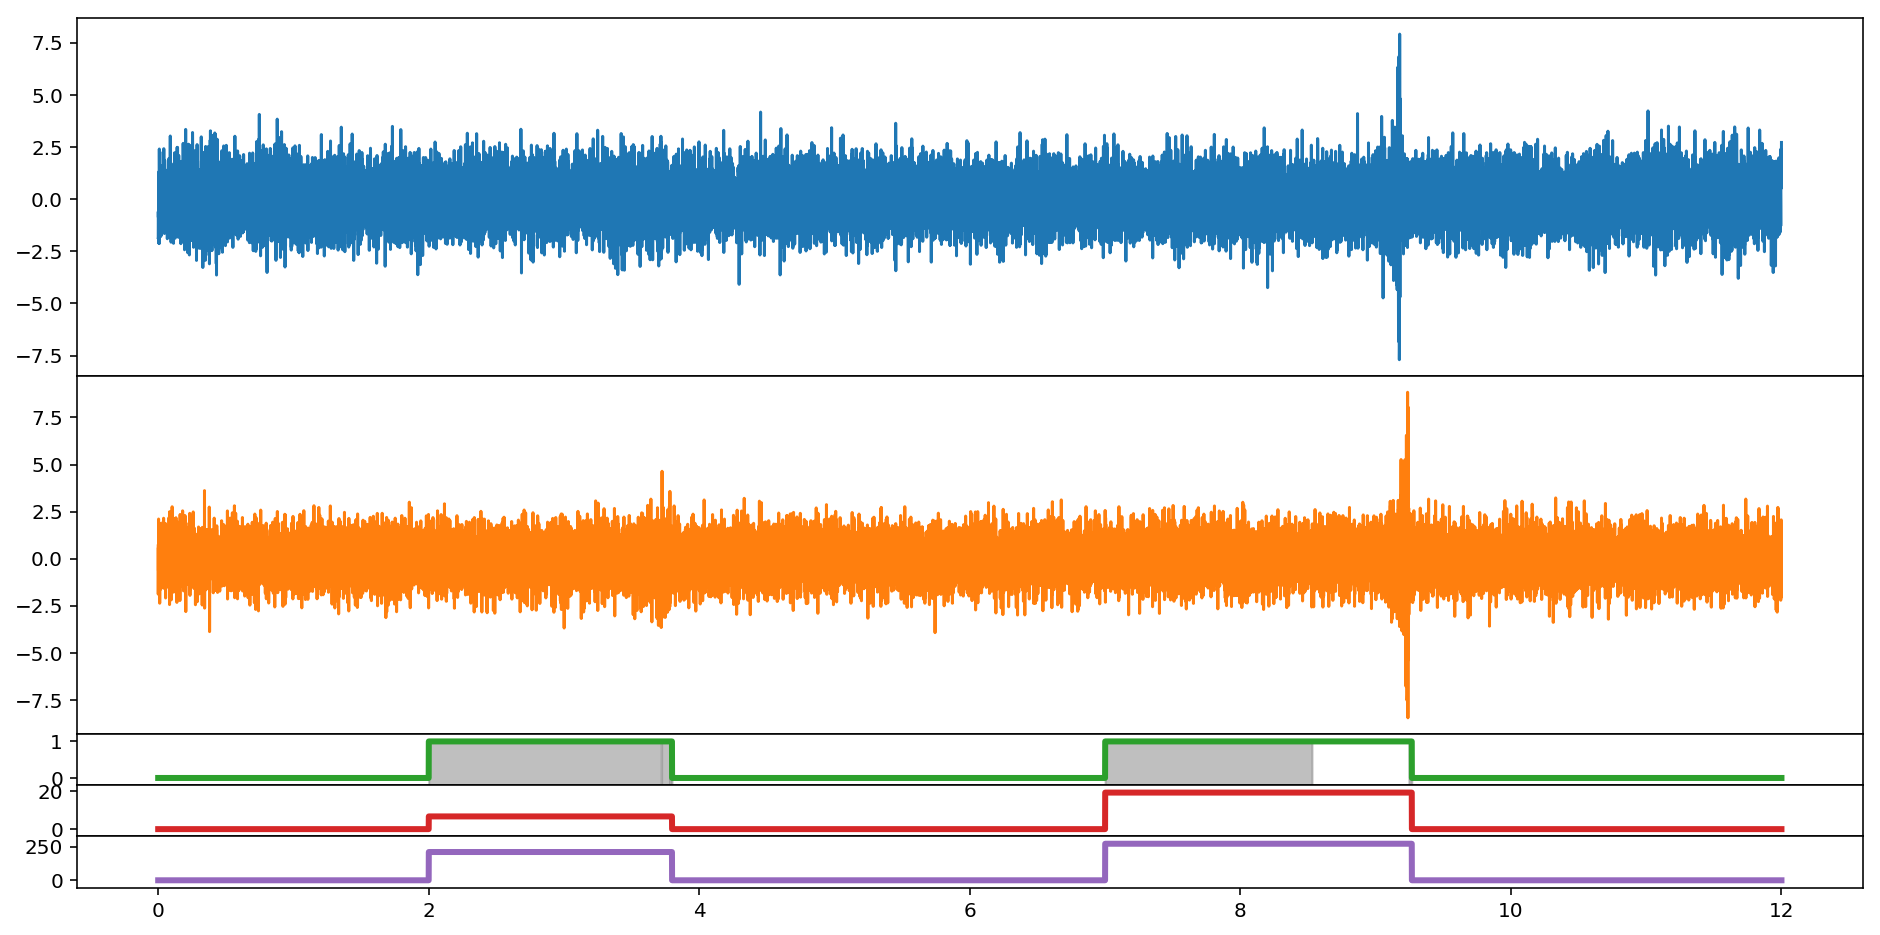

---------------------------------------------------------------------------------------------------------------------


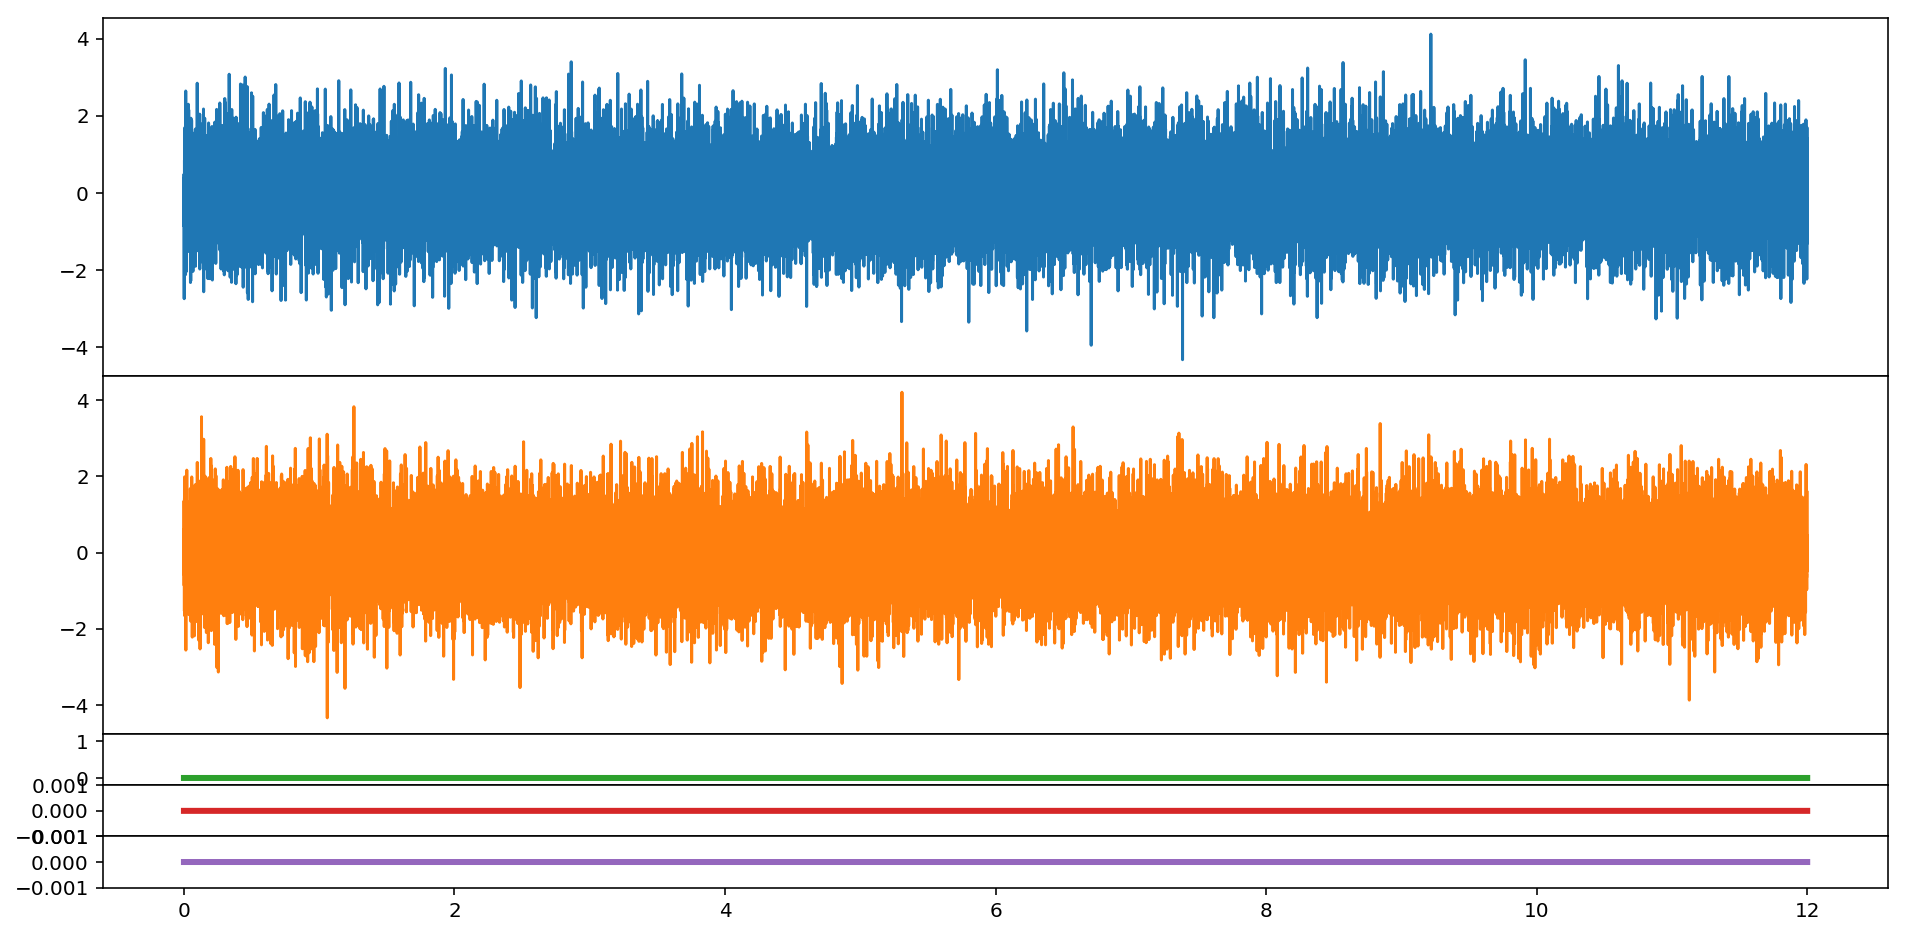

---------------------------------------------------------------------------------------------------------------------


In [14]:
for i in range(8, 16):
    
    timeseries_H1 = timeseries[i, 0, :, 0]
    timeseries_L1 = timeseries[i, 0, :, 1]
    label = labels[i]
    chirpmass = chirpmasses[i]
    distance = distances[i]
    
    grid = np.linspace(0, 12, 12*2048)
    fig, axes = plt.subplots(nrows=5, ncols=1, sharex='col',
                             gridspec_kw={'height_ratios': [7, 7, 1, 1, 1]}, 
                             figsize=(16, 8))
    
    axes[0].plot(grid, timeseries_H1, color='C0')
    axes[1].plot(grid, timeseries_L1, color='C1')
    
    """
    # Plot the fuzzy zones
    start = None
    in_zone = False
    fuzzy_zones = create_weights(label, start_size=1000, end_size=200)
    for j in range(len(fuzzy_zones)):
        if not in_zone:
            if fuzzy_zones[j] == 0:
                start = j
                in_zone = True
        if in_zone:
            if fuzzy_zones[j] == 1:
                axes[2].axvspan(start/2048, j/2048, alpha=0.5, color='Gray')
                in_zone = False
    """
    
    # Plot the fuzzy zones
    THRESHOLD = 0.5 * 10**(-21)
    fuzzy_zones = -1 * np.ones(len(label))
    for j in range(len(label)):
        if 0 < label[j] <= THRESHOLD:
            fuzzy_zones[j] = 1
    axes[2].fill_between(grid, -1, fuzzy_zones, color='Gray', alpha=0.5)
    
    axes[2].plot(grid, np.ceil(label), color='C2', lw=3)    
    axes[2].set_ylim(-0.2, 1.2)
    
    axes[3].plot(grid, chirpmass, color='C3', lw=3)
    axes[3].set_ylim(-0.2*np.max(chirpmass), 1.2*np.max(chirpmass))
    
    axes[4].plot(grid, distance, color='C4', lw=3)
    axes[4].set_ylim(-0.2*np.max(distance), 1.2*np.max(distance))
    
    fig.subplots_adjust(hspace=0)
    plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
    plt.show()
    
    print(117*'-')